In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("auto_clean.csv")
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [4]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


### We have two seperate columns for Diesel and gas, but we consider any one if its 1 for column gas and 0 in same column would indicate diesel.
### Will drop dielsel column for our dataset

In [5]:
data=data.drop(labels="diesel",axis=1)
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,1


In [6]:
#checking for Nan values
data[data.isna().any(axis=1) | data.isnull().any(axis=1)]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,gas
46,0,122,jaguar,std,two,sedan,rwd,front,102.0,0.921192,...,2.76,11.5,262.0,5000.0,13,17,36000.0,18.076923,NaN,1
52,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,NaN,9.4,101.0,6000.0,17,23,10945.0,13.823529,Low,1
53,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,NaN,9.4,101.0,6000.0,17,23,11845.0,13.823529,Low,1
54,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,NaN,9.4,101.0,6000.0,17,23,13645.0,13.823529,Low,1
55,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,...,NaN,9.4,135.0,6000.0,16,23,15645.0,14.687500,Medium,1


In [7]:
#Changing null values in column stroke
data["stroke"]=data["stroke"].replace(np.NaN,round(data["stroke"].mean(),2))
#data["stroke"].replace(np.NaN,np.mean(data["stroke"]))
data["stroke"].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 3.26, 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

In [8]:
##Lets change the Nan value of column Horsepower-binned
data.groupby("horsepower-binned").mean()["horsepower"]


horsepower-binned
High      174.782609
Low        78.026087
Medium    121.443747
Name: horsepower, dtype: float64

In [9]:
### the horsepower of null value in horsepower-pinned is 262 which more than the mean horsepower of HIGH
### Replacing the Nan in horsepower-binned as high
data["horsepower-binned"]=data["horsepower-binned"].replace(np.NaN,"High")
data["horsepower-binned"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

### Converting categorical data into numeric

In [10]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium
...,...,...,...,...,...,...,...,...,...,...
196,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,Medium
197,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,High
198,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,Medium
199,volvo,turbo,four,sedan,rwd,front,ohc,six,idi,Medium


In [11]:
cat_data.columns


Index(['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned'],
      dtype='object')

In [12]:
#getting all the unique values of categorical columns
cat_data_unique_values={cat_data.columns[x]:list(cat_data[cat_data.columns[x]].unique()) for x in range(len(cat_data.columns))}
cat_data_unique_values

{'make': ['alfa-romero',
  'audi',
  'bmw',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'mazda',
  'mercedes-benz',
  'mercury',
  'mitsubishi',
  'nissan',
  'peugot',
  'plymouth',
  'porsche',
  'renault',
  'saab',
  'subaru',
  'toyota',
  'volkswagen',
  'volvo'],
 'aspiration': ['std', 'turbo'],
 'num-of-doors': ['two', 'four'],
 'body-style': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
 'drive-wheels': ['rwd', 'fwd', '4wd'],
 'engine-location': ['front', 'rear'],
 'engine-type': ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'],
 'num-of-cylinders': ['four',
  'six',
  'five',
  'three',
  'twelve',
  'two',
  'eight'],
 'fuel-system': ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
 'horsepower-binned': ['Medium', 'Low', 'High']}

#### From above unique values of categorical columns, we can encode them in some ways
    num-of-doors,num-of-cylinders as text to number
    horsepower-binned as Rank encoding
    and rest of the columns in one-hot encoding

In [13]:
##num-of-doors,num-of-cylinders as text to number
from word2number import w2n
cat_data["num-of-doors"]=[w2n.word_to_num(cat_data.iloc[i,2]) for i in range(cat_data.shape[0])]
cat_data["num-of-cylinders"]=[w2n.word_to_num(cat_data.iloc[i,7]) for i in range(cat_data.shape[0])]
cat_data.head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,Medium
1,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,Medium
2,alfa-romero,std,2,hatchback,rwd,front,ohcv,6,mpfi,Medium
3,audi,std,4,sedan,fwd,front,ohc,4,mpfi,Medium
4,audi,std,4,sedan,4wd,front,ohc,5,mpfi,Medium


In [14]:
#horsepower-binned
cat_data["horsepower-binned"]=cat_data["horsepower-binned"].replace(["High","Medium","Low"],[1,2,3])
cat_data.head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,2
1,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,2
2,alfa-romero,std,2,hatchback,rwd,front,ohcv,6,mpfi,2
3,audi,std,4,sedan,fwd,front,ohc,4,mpfi,2
4,audi,std,4,sedan,4wd,front,ohc,5,mpfi,2


In [15]:
#One-hot encoding
cat_data=pd.get_dummies(cat_data,columns=['make', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type',  'fuel-system'])
cat_data.head()

,num-of-doors,num-of-cylinders,horsepower-binned,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,2,4,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,4,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,6,2,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,4,4,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,5,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


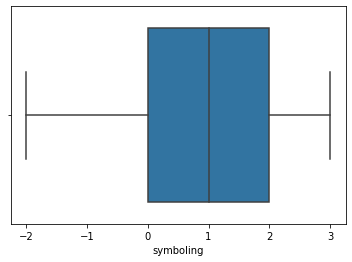

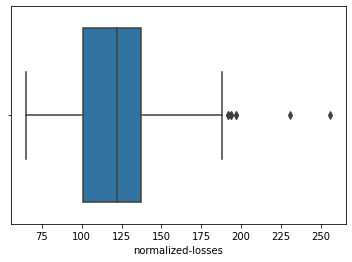

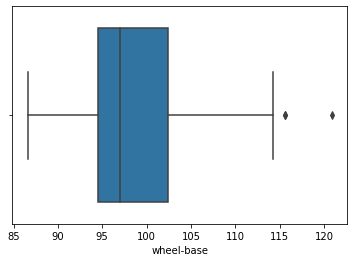

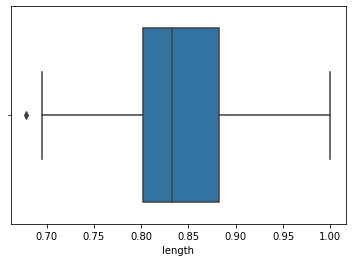

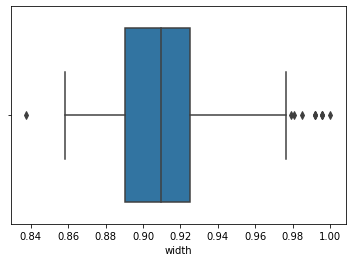

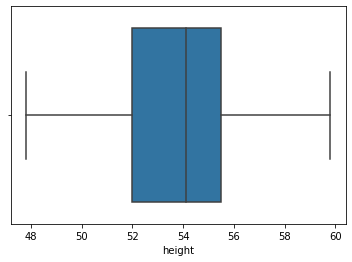

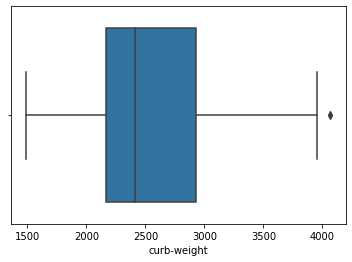

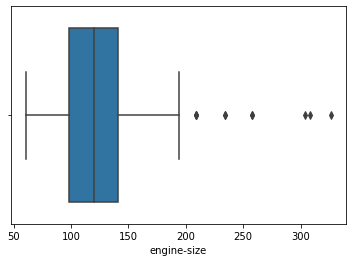

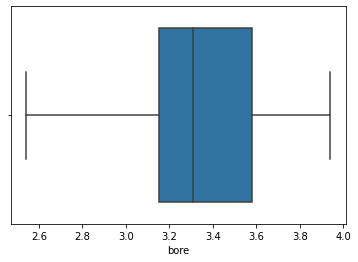

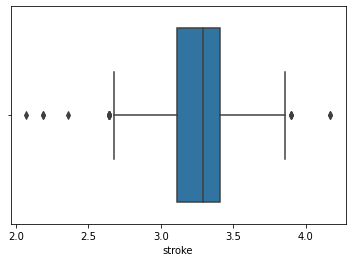

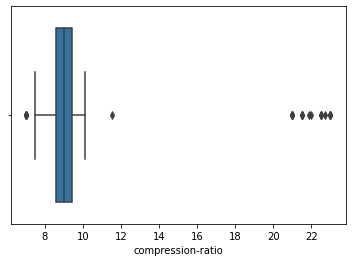

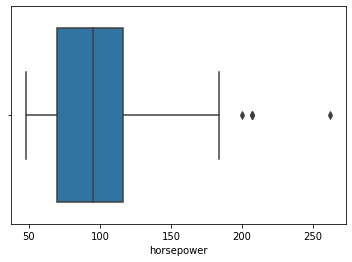

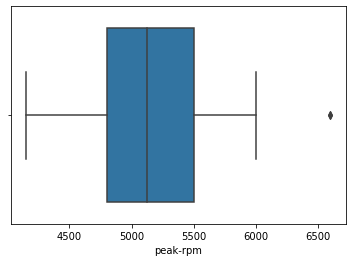

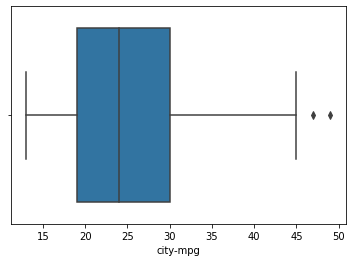

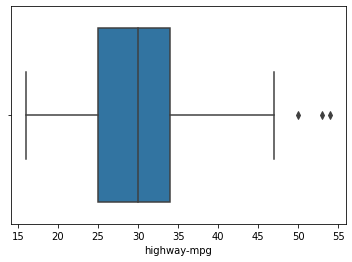

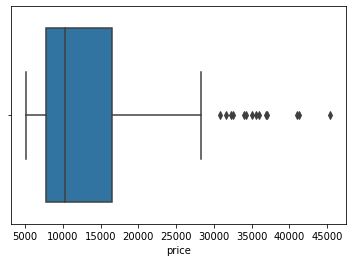

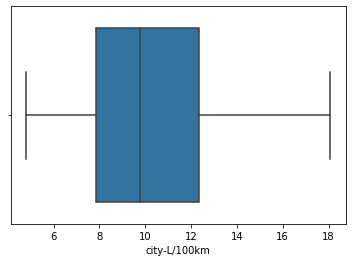

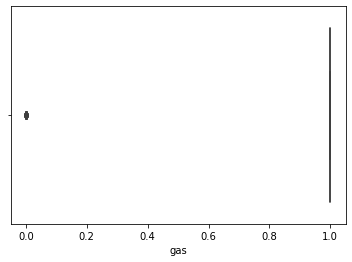

In [16]:
##Checking for outliers
num_data=data.select_dtypes(include=np.number)
for x in range(len(num_data.columns)):
        sns.boxplot(x=num_data[num_data.columns[x]])
        plt.show()

     We can see the outliers in following columns:
     "wheel-base, length,width, curb-weight, engine-size,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price"
     
     Let's remove outliers using Z-score
     z=(1-mean)/std.dev

In [17]:

def detect_outliers(data,cols):
    '''q1=data[cols].quantile(0.25)
    q3=data[cols].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3-(1.5*iqr)
    '''
    mean=np.mean(data[cols])
    std_dev=np.std(data[cols])
    
    index_list=data.index[np.abs((data[cols]-mean)/std_dev)>3]
    return list(index_list)






oulier_list=["wheel-base", "length","width", "curb-weight","engine-size","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]


outliers_index=[]
for x in oulier_list:
     outliers_index.extend(detect_outliers(num_data,x))

print("Outliers Index:",set(outliers_index))
print("Number of outliers:",len(set(outliers_index)))
        

Outliers Index: {130, 15, 17, 154, 155, 29, 161, 162, 170, 44, 45, 46, 178, 180, 183, 188, 60, 70, 71, 199, 87, 108, 110, 125}
Number of outliers: 24


    We have 24 outliers in a dataset which is 11.9% of data from current shape of dataset. 
    Will perform one clustering with outliers and another one without outliers, then compare the results.

### Clustering with Outliers

In [18]:
## combining the numeric and encoded data into one dataframe
data_train=data.select_dtypes(include=np.number)
data_train=pd.concat([data_train,cat_data],axis=1)


In [19]:
data_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [20]:
#will predict the class with car specifications, will remove the columns not relevant to specifications
data_train=data_train.drop(labels=["symboling","normalized-losses"],axis=1)

Implementing K-means

In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=50).fit(data_train)

print("Cluster labels:",kmeans.labels_)
print("Cluster inertia:",kmeans.inertia_)

Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 1 1 1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2 2 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 2 2 1 1 1 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0
 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2]
Cluster inertia: 1391040398.7312684


Cluster 1 has :  12731066776.749569
Cluster 2 has :  4089676650.768716
Cluster 3 has :  1391040398.7312684
Cluster 4 has :  918238230.5379716
Cluster 5 has :  627565168.4107221
Cluster 6 has :  461283069.773548
Cluster 7 has :  344705134.39103615
Cluster 8 has :  281788317.9447792


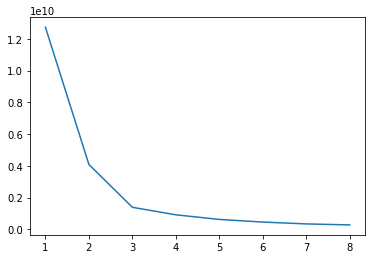

In [22]:
##Lets find optimal no.of.clusters
n_clusters=range(1,9)
inertia_list=[]
klabels={}
for x in n_clusters:
    kmeans=KMeans(n_clusters=x,random_state=70).fit(data_train)
    inertia_list.append(kmeans.inertia_)
    klabels[x]=kmeans.labels_
    print("Cluster",x,"has : ",kmeans.inertia_)

plt.plot(n_clusters,inertia_list)
plt.show()

will consider 3 as the optimum number of clusters

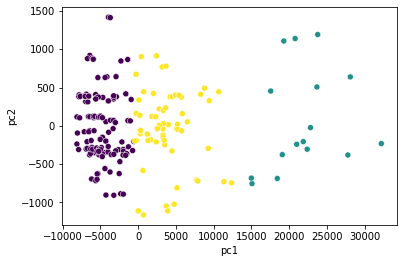

In [23]:
# will visualize these clusters using PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pd.DataFrame(pca.fit_transform(data_train),columns=["pc1","pc2"])
pca_data["target"]=klabels[3]


sns.scatterplot(x=pca_data.pc1,y=pca_data.pc2,c=pca_data.target)
plt.show()



Cluster 1 has :  12717571418.041264
Cluster 2 has :  4076926469.011347
Cluster 3 has :  1380196786.7124717
Cluster 4 has :  907777652.087362
Cluster 5 has :  617902586.199778
Cluster 6 has :  451918879.33934367
Cluster 7 has :  336870515.5972106
Cluster 8 has :  273326882.2018179


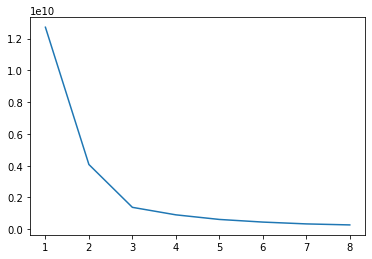

In [24]:
##Lets find optimal no.of.clusters using pca 
n_clusters=range(1,9)
inertia_list=[]
klabels={}
for x in n_clusters:
    kmeans=KMeans(n_clusters=x,random_state=70).fit(pca_data.iloc[:,:-1])
    inertia_list.append(kmeans.inertia_)
    klabels[x]=kmeans.labels_
    print("Cluster",x,"has : ",kmeans.inertia_)

plt.plot(n_clusters,inertia_list)
plt.show()

    Here also the optimum number of cluster is 3 and inertia values have slight different than with non-pca data

In [25]:
#merging data and clusters, as symboling and normalized losses were removed while creating clusters its better to drop here too 
data_with_outliers=pd.concat([data.iloc[:,2:],pd.DataFrame(klabels[3],index=list(data.index),columns=["Cluster"])],axis=1)

data_with_outliers

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,gas,Cluster
0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,1,2
1,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,1,2
2,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,1,2
3,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,1,2
4,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,1,2
197,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,1,2
198,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,1,2
199,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,0,2


In [26]:
##Renaming cluster values
print(data_with_outliers["Cluster"].value_counts())
data_with_outliers["Cluster"]=data_with_outliers["Cluster"].replace([0,1,2],[1,2,3])
print(data_with_outliers["Cluster"].value_counts())

0    122
2     63
1     16
Name: Cluster, dtype: int64
1    122
3     63
2     16
Name: Cluster, dtype: int64


In [27]:
data_with_outliers.to_csv("Data_with_outliers.csv")

### Clustering without outliers

In [28]:
## combining the numeric and encoded data into one dataframe
data_train_wo=data.select_dtypes(include=np.number)
data_train_wo=pd.concat([data_train_wo,cat_data],axis=1)
data_train_wo=data_train_wo.drop(data_train_wo.index[outliers_index])


In [29]:
data_train_wo

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,74,104.3,0.907256,0.933333,57.5,3157,130,3.62,3.15,...,0,0,0,0,0,0,0,1,0,0
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0


In [30]:
#will predict the class with car specifications, will remove the columns not relevant to specifications
data_train_wo=data_train_wo.drop(labels=["symboling","normalized-losses"],axis=1)

In [31]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=50).fit(data_train_wo)

print("Cluster labels:",kmeans.labels_)
print("Cluster inertia:",kmeans.inertia_)

Cluster labels: [2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 0 0 0 0 0 0 2 1 1 1 1 1 1 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2
 0 0 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2]
Cluster inertia: 986915418.4856822


Cluster 1 has :  7635033500.482001
Cluster 2 has :  2637102055.999654
Cluster 3 has :  986915418.4856822
Cluster 4 has :  574261485.4225069
Cluster 5 has :  383395542.81875443
Cluster 6 has :  279965904.0461947
Cluster 7 has :  228029577.4881789
Cluster 8 has :  185224021.35236445


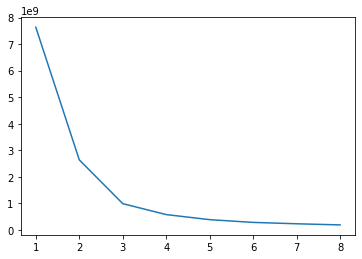

In [32]:
##Lets find optimal no.of.clusters
n_clusters=range(1,9)
inertia_list=[]
klabels={}
for x in n_clusters:
    kmeans=KMeans(n_clusters=x,random_state=70).fit(data_train_wo)
    inertia_list.append(kmeans.inertia_)
    klabels[x]=kmeans.labels_
    print("Cluster",x,"has : ",kmeans.inertia_)

plt.plot(n_clusters,inertia_list)
plt.show()

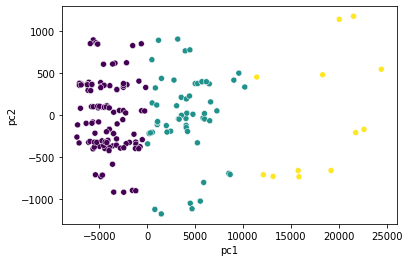

In [33]:
# will visualize these clusters using PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pd.DataFrame(pca.fit_transform(data_train_wo),columns=["pc1","pc2"])
pca_data["target"]=klabels[3]


sns.scatterplot(x=pca_data.pc1,y=pca_data.pc2,c=pca_data.target)
plt.show()



Cluster 1 has :  7624991320.736181
Cluster 2 has :  2627070300.8152976
Cluster 3 has :  979195806.9830673
Cluster 4 has :  566499787.4860415
Cluster 5 has :  376382014.6689653
Cluster 6 has :  273812000.6179598
Cluster 7 has :  221483504.38755536
Cluster 8 has :  179218603.49733007


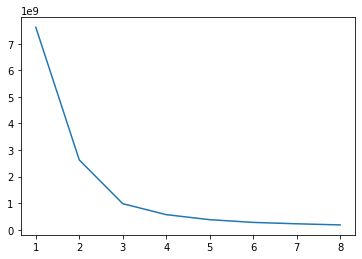

In [34]:
##Lets find optimal no.of.clusters using pca 
n_clusters=range(1,9)
inertia_list=[]
klabels={}
for x in n_clusters:
    kmeans=KMeans(n_clusters=x,random_state=70).fit(pca_data.iloc[:,:-1])
    inertia_list.append(kmeans.inertia_)
    klabels[x]=kmeans.labels_
    print("Cluster",x,"has : ",kmeans.inertia_)

plt.plot(n_clusters,inertia_list)
plt.show()

    Optimum number of clusters is 3 in data without outliers too.

In [35]:
#merging data and clusters, as symboling and normalized losses were removed while creating clusters its better to drop here too
data_without_outliers=pd.concat([data.iloc[:,2:],pd.DataFrame(klabels[3],index=list(data_train_wo.index),columns=["Cluster"])],axis=1)
data_without_outliers=data_without_outliers.drop(data_without_outliers.index[outliers_index])
data_without_outliers

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,gas,Cluster
0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,1,1.0
1,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,1,1.0
2,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,1,1.0
3,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,1,1.0
4,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,volvo,turbo,four,wagon,rwd,front,104.3,0.907256,0.933333,57.5,...,7.5,162.0,5100.0,17,22,18950.0,13.823529,High,1,1.0
196,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,1,1.0
197,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,1,1.0
198,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,1,1.0


In [36]:
##Renaming cluster values
print(data_without_outliers["Cluster"].value_counts())
data_without_outliers["Cluster"]=data_without_outliers["Cluster"].replace([0,1,2],[1,2,3])
print(data_without_outliers["Cluster"].value_counts())

0.0    108
1.0     57
2.0     12
Name: Cluster, dtype: int64
1.0    108
2.0     57
3.0     12
Name: Cluster, dtype: int64


In [37]:
data_without_outliers.to_csv("Data_without_outliers.csv")

    Will derive insights from both data and compare